<a href="https://www.kaggle.com/code/muhammadasifwazir/fashion-mnist-image-classifier-using-cnn?scriptVersionId=198498204" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fashion MNIST Image Classifier using Convolutional Neural Networks (CNN)

This notebook builds a CNN-based image classifier to classify images from the Fashion MNIST dataset.
The dataset consists of 60,000 training images and 10,000 testing images, each being a 28x28 grayscale image
of clothing items from 10 categories, including t-shirts, trousers, dresses, etc.

### The steps include:
1. Loading and preprocessing the dataset (normalization).
2. Visualizing some images from the dataset.
3. Building a CNN model.
4. Training the model on the training data.
5. Evaluating the model on the test data.

### Libraries Used:
- TensorFlow: for building and training the deep learning model.
- Matplotlib: for visualizing the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping

## Task 1: Load and Visualize Data

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


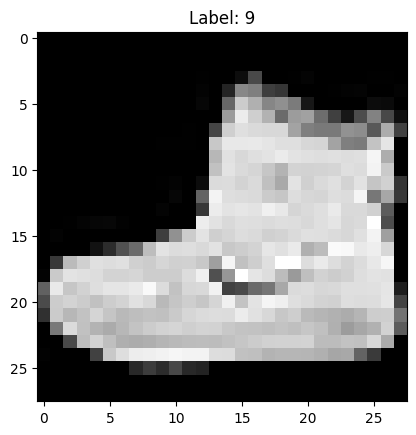

In [2]:
# Task 1: Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Visualize a sample image
plt.imshow(x_train[0], cmap='gray')
plt.title(f'Label: {y_train[0]}')
plt.show()

**Task 2: Data Preprocessing**

In [3]:
# Preprocessing the data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

**Task 3: Build and Train CNN Model**

In [4]:
# Task 3: Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Task 4: Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, callbacks=[early_stopping])

Epoch 1/10


I0000 00:00:1727429294.787050      67 service.cc:145] XLA service 0x7c3eec006340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727429294.787105      67 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1727429294.787109      67 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  90/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5808 - loss: 1.1847

I0000 00:00:1727429297.304439      67 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8152 - loss: 0.5196 - val_accuracy: 0.8860 - val_loss: 0.3063
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9011 - loss: 0.2701 - val_accuracy: 0.8989 - val_loss: 0.2751
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9203 - loss: 0.2169 - val_accuracy: 0.9012 - val_loss: 0.2716
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9296 - loss: 0.1866 - val_accuracy: 0.9081 - val_loss: 0.2521
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9439 - loss: 0.1546 - val_accuracy: 0.9143 - val_loss: 0.2455
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9513 - loss: 0.1294 - val_accuracy: 0.9109 - val_loss: 0.2650
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9612 - loss: 0.1075 - val_accuracy: 0.9173 - val_loss: 0.2660
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9674 - loss: 0.0897 - val_accurac

**Task 4: Model Evaluation and Visualization**

In [6]:
# Task 5: Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9073 - loss: 0.3586
Test Accuracy: 91.02%


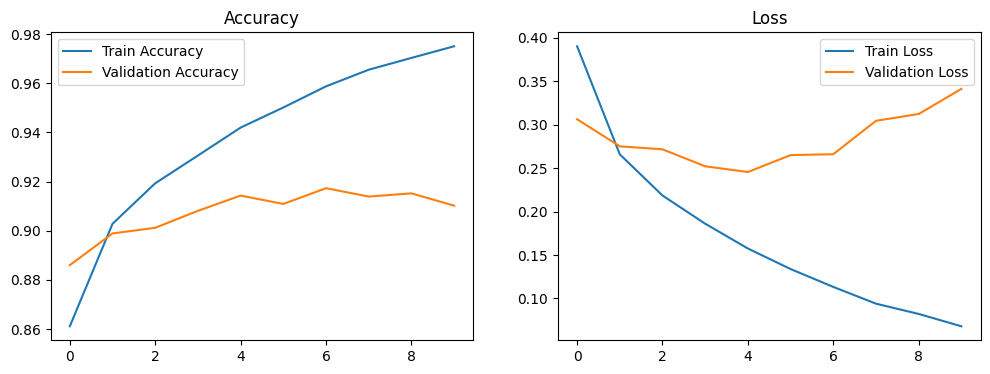

In [7]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

## Task 5: Improved Models with Comparison

In [8]:
# Task 6: Improved model with Dropout
model_improved = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the improved model
model_improved.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the improved model
history_improved = model_improved.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, callbacks=[early_stopping])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7163 - loss: 0.7785 - val_accuracy: 0.8588 - val_loss: 0.3738
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8529 - loss: 0.4095 - val_accuracy: 0.8816 - val_loss: 0.3279
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8754 - loss: 0.3423 - val_accuracy: 0.8954 - val_loss: 0.2902
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8854 - loss: 0.3173 - val_accuracy: 0.8993 - val_loss: 0.2782
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8913 - loss: 0.2964 - val_accuracy: 0.8991 - val_loss: 0.2747


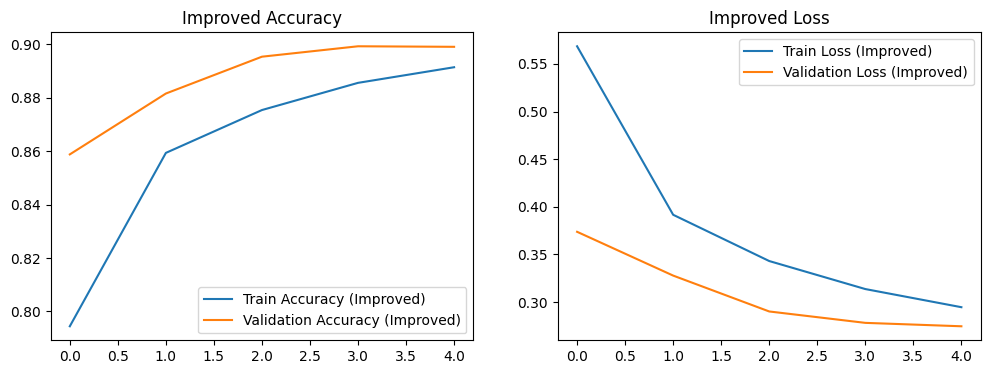

In [9]:
# Plot improved accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='Train Accuracy (Improved)')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy (Improved)')
plt.title('Improved Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='Train Loss (Improved)')
plt.plot(history_improved.history['val_loss'], label='Validation Loss (Improved)')
plt.title('Improved Loss')
plt.legend()

plt.show()